# Analysing PSO on the Easam function

f(x1,x2) = -cos(x1)cos(x2)exp(-(x1-pi)²-(x2-pi)²)

The function is usually evaluated on the square [-100,100] and has a global miminima at x*=(pi,pi), with f(x*)=-1 

## Particle Swarm Optimization
### Optimization

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

%load_ext autoreload
%autoreload 2

In [2]:
%%time

# Set up hyperparameters:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
## c1 = cognitive parameter (follow its personal best position)
## c2 = social parameter    (follow the swarm's global best position)
## w = inertia parameter    (controls the inertia of the swarm's movement)

# Call instance of PSO:
optimizer = ps.single.GlobalBestPSO(n_particles=20, 
                                    dimensions=2,
                                    bounds=[(0, 0), (5, 5)],
                                    options=options,
                                    init_pos=None)
                                    ## (None: generate the particles randomly)

# Perform optimization:
cost, pos = optimizer.optimize(objective_func=fx.easom, 
                               iters=50)

2020-06-26 08:42:20,589 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-1  
2020-06-26 08:42:20,640 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9999833048025727, best pos: [3.13946078 3.14415885]


CPU times: user 62.9 ms, sys: 3.88 ms, total: 66.8 ms
Wall time: 55.3 ms


### Cost History Plot

In [3]:
# Import plotting tool for optimizer analysis
from pyswarms.utils.plotters import plot_cost_history

# Import class to format plots
from pyswarms.utils.plotters.formatters import Designer

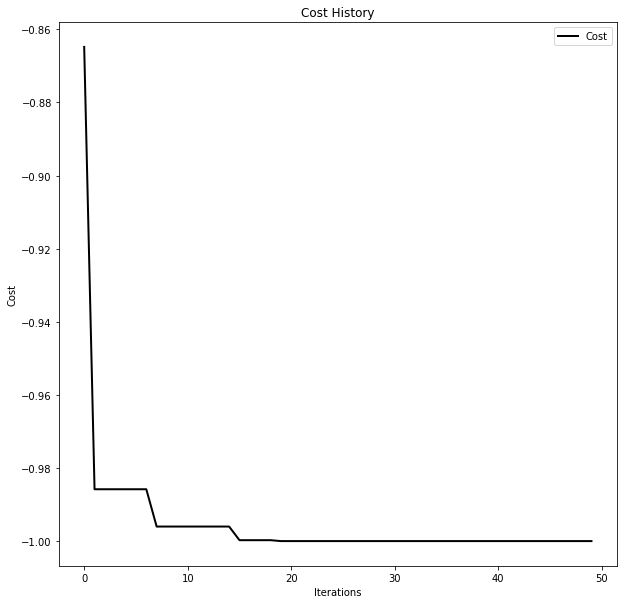

In [4]:
#Create designer for specifying the plot's formatting and design
cost_history_designer = Designer(figsize=(10,10),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['Iterations','Cost'],
                            limits=[(0, 50),(0, 80)],
                            colormap=plt.cm.viridis)

# Create a simple line plot with the cost in the y-axis and the iteration at the x-axis
plot_cost_history(cost_history=optimizer.cost_history,
                  ax=None,
                  title='Cost History',
                  designer=cost_history_designer )
plt.show()

### Visualization


In [5]:
# Import plotting tools for optimizer analysis
from pyswarms.utils.plotters.plotters import (plot_contour, plot_surface)

# Import classes to format plots and create meshes
from pyswarms.utils.plotters.formatters import (Animator, Designer, Mesher)

#### Contour Plot in 2D

In [6]:
#Create designer for specifying the plot's formatting and design
contour_designer = Designer(figsize=(10,10),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['x-axis','y-axis'],
                            limits=[(0, 5),(0, 5)],
                            colormap=plt.cm.viridis)

In [7]:
# Create mesher class for plotting contours of objective functions
contour_mesher = Mesher(func=fx.easom,
                        delta=0.1,                            
                        limits=[(0, 5),(0,5)],
                        levels=np.arange(-3.0, 1.0, 0.5),
                        alpha=0.3)

In [8]:
# Create animator for specifying animation behavior
contour_animator = Animator(interval=480,
                            repeat_delay=120,
                            repeat=True)     

In [9]:
%%capture

# Make animation in 2D
animation_2d = plot_contour(pos_history=optimizer.pos_history,
                         canvas=None,
                         title="Contour Plot",
                         mark=(0.0, 0.0),
                         designer=contour_designer,
                         mesher=contour_mesher,
                         animator=contour_animator)

In [10]:
# Create a gif of the 2D animation
animation_2d.save('gif_contour_plot.gif', writer='imagemagick', fps=5)
Image(url='gif_contour_plot.gif')

2020-06-26 08:42:21,250 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-06-26 08:42:21,253 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x720 -depth 8 -delay 20.0 -loop 0 rgba:- gif_contour_plot.gif


#### Surface Plot in 3D

In [11]:
#Create designer for specifying the plot's formatting and design
surface_designer = Designer(figsize=(20,20),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['x-axis','y-axis', 'cost'],
                            limits=[(0, 5),(0, 5), (-2.0, 2)],
                            colormap=plt.cm.viridis)

In [12]:
# Create mesher class for plotting contours of objective functions
surface_mesher = Mesher(func=fx.easom,
                        delta=0.1,                            
                        limits=[(0, 5),(0, 5), (-2.0, 2)],
                        levels=np.arange(-3.0, 1.0, 0.2),
                        alpha=0.3)

In [13]:
# Create animator for specifying animation behavior
surface_animator = Animator(interval=480,
                            repeat_delay=60,
                            repeat=True)

In [14]:
# Obtain a position-fitness matrix 
pos_history_3d = surface_mesher.compute_history_3d(optimizer.pos_history)

In [15]:
%%capture

# Make animation in 3D
animation_3d = plot_surface(pos_history=pos_history_3d,
                           canvas=None,
                           title='Surface Plot',
                           mark=(0,0,0),
                           designer=surface_designer, 
                           mesher=surface_mesher,
                           animator=surface_animator)

In [ ]:
# Create a gif of the 3D animation
animation_3d.save('gif_surface_plot.gif', writer='imagemagick', fps=5)
Image(url='gif_surface_plot.gif')

2020-06-26 08:42:32,478 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-06-26 08:42:32,479 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 1440x1440 -depth 8 -delay 20.0 -loop 0 rgba:- gif_surface_plot.gif
